In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# plots in LaTeX-style
import tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())

In [24]:
# load data
data = pd.read_csv("../data/Food_Production.csv", sep=";")

# Data exploration

In [25]:

data.head()

,Food product,Plant based,Land Use Change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total Emissions,...,Freshwater Withdrawals per 100g Protein (liters per 100g Protein),Freshwater Withdrawals per kilogram (liters per kilogram),Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal),Greenhouse Gas Emissions per 100g Protein (kgCO2eq per 100g Protein),Land Use per 1000kcal (m2 per 1000kcal),Land Use per Kilogram (m2 per kilogram),Land Use per 100g Protein (m2 per 100g Protein),Scarcity weighted Water Use per Kilogram (liters per kilogram),Scarcity weighted Water Use per 100g protein (liters per 100g protein),Scarcity weighted Water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),True,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),True,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),True,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,True,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,True,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [27]:
data.dtypes

Food product                                                                object
Plant based                                                                   bool
Land Use Change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packaging                                                                  float64
Retail                                                                     float64
Total Emissions                                                            float64
Eutrophying Emissions per 1000kcal (gPO4eq per 1000kcal)                   float64
Eutrophying Emissions per Kilogram (gPO4eq per kilogram)                   float64
Eutr

In [6]:
# Imputation of the missing values via arithmetic mean
data = data.fillna(data.mean(numeric_only=True))

In [31]:
data_plant = data[data["Plant based"] == True]
data_animal = data[data["Plant based"] == False]

In [32]:
mean_plant = data_plant["Total Emissions"].mean()
mean_animal = data_animal["Total Emissions"].mean()
var_plant = data_plant["Total Emissions"].var()
var_animal = data_animal["Total Emissions"].var()
print("Plant based average emissions: " + str(round(mean_plant, 3)) + "\n" + 
      "Animal-based average emissions: " + str(round(mean_animal, 3)))
print("Plant-based emissions variance: " + str(round(var_plant, 3)) + "\n" + 
      "Animal-based emissions variance: " + str(round(var_animal, 3)))

Plant based average emissions: 2.319
Animal-based average emissions: 16.6
Plant-based emissions variance: 10.145
Animal-based emissions variance: 264.798


## Plots


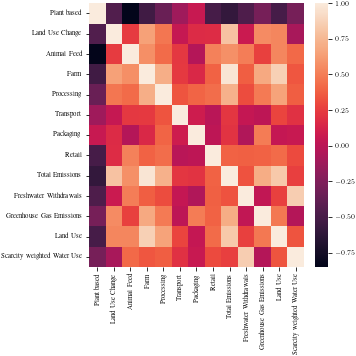

In [33]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (5,5))

    # Plotting code
    columns = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals per kilogram (liters per kilogram)',
       'Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)',
       'Land Use per Kilogram (m2 per kilogram)',
       'Scarcity weighted Water Use per Kilogram (liters per kilogram)']
    labels = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals',
       'Greenhouse Gas Emissions',
       'Land Use',
       'Scarcity weighted Water Use']
    data_corr = data[columns]
    #data_corr = data_corr.set_axis(labels, axis=1).corr(numeric_only=True)
    data_corr = data_corr.set_axis(labels, axis=1).corr()
    corr_plot = sns.heatmap(data_corr, ax=axs)

    # Save plot
    fig.savefig(
    "figures/corrplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

# Total emissions

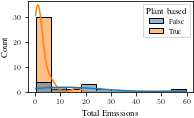

In [34]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, hue="Plant based", data=data)
    plt.title("Total emissions for plant-based and animal-based food categories")
    # Save plot
    # fig.savefig(
    # "figures/testplot.pdf",
    # bbox_inches="tight",
    # pad_inches=0.01,
    # )

Observation:
- plant based emissions look chi-squared distributed

Problem:
-  Most tests assume gaussian distributed data.
So, let's transform data by applying  log and check out the distribution

### data Transformation:   log()

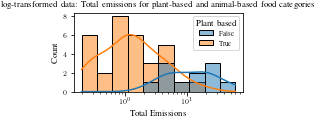

In [35]:
#### data Transformation:   log()
#  for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=True, data=data, hue="Plant based")
    plt.title("log-transformed data: Total emissions for plant-based and animal-based food categories")
    # Save plot
    fig.savefig(
    "figures/logplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

# GHG emissions per 1000 kcal

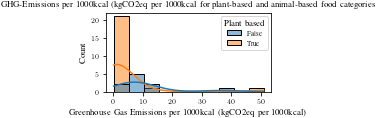

In [36]:
# original data
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=False, data=data, hue="Plant based")
    plt.title("GHG-Emissions per 1000kcal (kgCO2eq per 1000kcal for plant-based and animal-based food categories")
    # Save plot
    fig.savefig(
    "figures/logplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

In [38]:
#### data Transformation:   log()
# for nice plots (pdf) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=True, data=data, hue="Plant based")
    plt.title("log-transformed data: GHG-Emissions per 1000kcal (kgCO2eq per 1000kcal for plant-based and animal-based food categories")
    # Save plot
    fig.savefig(
    "figures/logplot.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

RuntimeError: latex was not able to process the following string:
b'log-transformed data: GHG-Emissions per 1000kcal \\\\(kgCO2eq per 1000kcal for plant-based and animal-based food categories'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/hanna/.matplotlib/tex.cache/d97d974af665ad44716e654a6a045d0c.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-07-17>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file d97d974af665ad44716e654a6a045d0c.aux.
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.19 ...nt-based and animal-based food categories}
                                                  
No pages of output.
Transcript written on d97d974af665ad44716e654a6a045d0c.log.




RuntimeError: latex was not able to process the following string:
b'log-transformed data: GHG-Emissions per 1000kcal \\\\(kgCO2eq per 1000kcal for plant-based and animal-based food categories'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/hanna/.matplotlib/tex.cache/d97d974af665ad44716e654a6a045d0c.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-07-17>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file d97d974af665ad44716e654a6a045d0c.aux.
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1ptm.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Extra }, or forgotten $.
l.19 ...nt-based and animal-based food categories}
                                                  
No pages of output.
Transcript written on d97d974af665ad44716e654a6a045d0c.log.




<Figure size 198x122.371 with 1 Axes>

### Observation: 
- Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal) feature looks even more gaussian than considering toal emissions

In [ ]:
mean_plant = data_plant["Total Emissions"].mean()
mean_animal = data_animal["Total Emissions"].mean()
var_plant = data_plant["Total Emissions"].var()
var_animal = data_animal["Total Emissions"].var()
print("Plant based average emissions: " + str(round(mean_plant, 3)) + "\n" + 
      "Animal-based average emissions: " + str(round(mean_animal, 3)))
print("Plant-based emissions variance: " + str(round(var_plant, 3)) + "\n" + 
      "Animal-based emissions variance: " + str(round(var_animal, 3)))

Plant based average emissions: 2.319
Animal-based average emissions: 16.6
Plant-based emissions variance: 10.145
Animal-based emissions variance: 264.798


### TODO:
- Test (and why this test)
    - depict reasoning as to why log scale and respective t-test plotting one w/o log-scale --> similar to chi-squared distribution, plus plot in log-scale, which shows a distribution mor similar to a normal distribution. 
    - experiment with kde, maybe no histogram but only kde and mean

### TODO:
- Add Legend:
    -   put animal and plant based column in one df so that plotting with legend will be possible 
- Test (and why this test)
    - depict reasoning as to why log scale and respective t-test plotting one w/o log-scale --> similar to chi-squared distribution, plus plot in log-scale, which shows a distribution mor similar to a normal distribution. 
    - experiment with kde, maybe no histogram but only kde and mean

# Data Analysis

## T-Tests

H_0:

H_1:
